<a href="https://colab.research.google.com/github/mwilamilandile/SOLID_WASTE_PREDICTING/blob/main/FINAL_EXPERIMENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas numpy scikit-learn matplotlib seaborn keras tensorflow


Epoch 1/50
48/56 [========================>.....] - ETA: 0s - loss: 641332800.0000
Epoch 1: val_loss improved from inf to 643387200.00000, saving model to best_model.h5
56/56 [==============================] - 3s 12ms/step - loss: 638150912.0000 - val_loss: 643387200.0000
Epoch 2/50
34/56 [=================>............] - ETA: 0s - loss: 639822912.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/56 [=======================>......] - ETA: 0s - loss: 636178048.0000
Epoch 2: val_loss improved from 643387200.00000 to 641666176.00000, saving model to best_model.h5
56/56 [==============================] - 0s 6ms/step - loss: 637198656.0000 - val_loss: 641666176.0000
Epoch 3/50
54/56 [===========================>..] - ETA: 0s - loss: 633057728.0000
Epoch 3: val_loss improved from 641666176.00000 to 637231872.00000, saving model to best_model.h5
56/56 [==============================] - 0s 8ms/step - loss: 634293376.0000 - val_loss: 637231872.0000
Epoch 4/50
49/56 [=========================>....] - ETA: 0s - loss: 633196352.0000
Epoch 4: val_loss improved from 637231872.00000 to 628444480.00000, saving model to best_model.h5
56/56 [==============================] - 0s 7ms/step - loss: 628097216.0000 - val_loss: 628444480.0000
Epoch 5/50
46/56 [=======================>......] - ETA: 0s - loss: 611942912.0000
Epoch 5: val_loss improved from 628444480.00000 to 613377600.00000, saving m

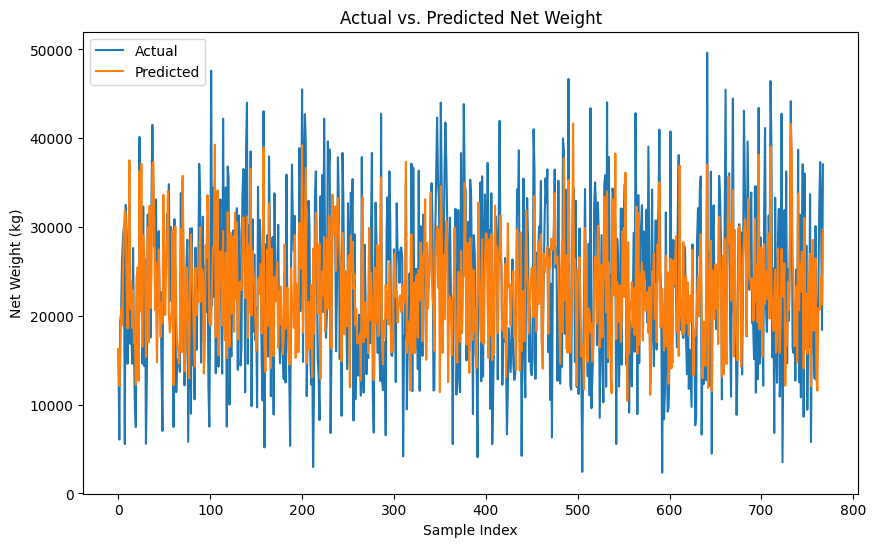

In [ ]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.regularizers import l1_l2

# Loading the dataset
data = pd.read_csv("/content/Boralesgamuwa_2012_2018_with_features.csv")

# Converting 'ticket_date' to datetime and set as index
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)

# Droping non-numeric columns and the 'ticket_date' if not needed
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data.drop(non_numeric_columns, axis=1, inplace=True)

# Filling in missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Defining features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'day_of_week', 'month']
target = 'net_weight_kg'

X = data[features]
y = data[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['day_of_week', 'month'])

# Spliting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
model.add(Dropout(0.3))  # Regularization with dropout
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.3))  # Additional dropout for regularization
model.add(Dense(1, activation='linear'))  # Output layer for regression tasks

# Compiling the model with Adam optimizer and mean squared error loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)

# Train the model
model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Predict on the test set
y_pred = model.predict(X_test_scaled).flatten()  # Flatten to ensure 1D

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Display the evaluation metrics
print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()


In [ ]:
!pip install tensorflow scikit-learn keras lightgbm matplotlib numpy


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 1789, number of used features: 24
[LightGBM] [Info] Start training from score 23354.773617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 1431, number of used features: 24
[LightGBM] [Info] Start training from score 23318.211041
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the tra

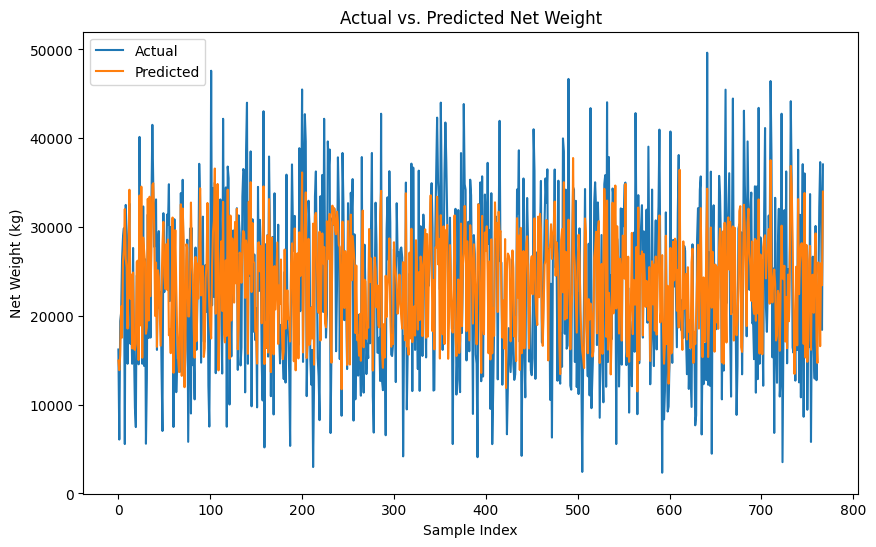

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb
import xgboost as xgb

# Load the dataset
data = pd.read_csv("/content/Boralesgamuwa_2012_2018_with_features.csv")

# Convert 'ticket_date' to datetime and set it as index
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)

# Fill missing values with forward and backward fill
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Drop non-numeric columns and unnecessary fields
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data.drop(non_numeric_columns, axis=1, inplace=True)

# Feature engineering: Add additional features
data['week_of_year'] = data.index.isocalendar().week  # Week of the year
data['day_of_year'] = data.index.dayofyear  # Day of the year

# Define features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'day_of_week', 'month', 'week_of_year', 'day_of_year']
target = 'net_weight_kg'

# One-hot encode categorical variables
X = pd.get_dummies(data[features], columns=['day_of_week', 'month'])

# Define the target variable
y = data[target]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()  # You can also try MinMaxScaler or RobustScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models for stacking with tuned hyperparameters
base_models = [
    ('svm', SVR(C=1.0, epsilon=0.1)),  # Support Vector Machines with tuning
    ('knn', KNeighborsRegressor(n_neighbors=5)),  # K-Nearest Neighbors with 5 neighbors
    ('rf', RandomForestRegressor(n_estimators=200)),  # Random Forest with more trees
    ('lgb', lgb.LGBMRegressor(n_estimators=200)),  # LightGBM with more estimators
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200)),  # XGBoost with more estimators
]

# Meta-model for stacking: Experiment with Linear Regression or Ridge
meta_model = Ridge()  # Ridge regression as a meta-model to avoid overfitting

# Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = stacked_model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()


In [ ]:
# Example: Using RandomizedSearchCV to tune the base models in a stacking regressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Setting a pipeline to include scaling
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5  # Adjust if needed
    ))
])

# Define a parameter grid for RandomizedSearchCV
param_grid = {
    'stacking__svm__C': [0.1, 1, 10],
    'stacking__svm__epsilon': [0.1, 0.5, 1.0],
    'stacking__knn__n_neighbors': [3, 5, 7],
    'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__lgb__learning_rate': [0.01, 0.1, 0.2],
    'stacking__xgb__learning_rate': [0.01, 0.1, 0.2],
    'stacking__xgb__max_depth': [3, 6, 9],
    'stacking__xgb__n_estimators': [100, 200, 300],
    'stacking__final_estimator__alpha': [0.1, 1, 10]
}

# RandomizedSearchCV for tuning with cross-validation
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Use the right scoring metric
    cv=5,  # Cross-validation
    verbose=1,
    n_jobs=-1,  # Use multiple cores for faster computation
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Best parameters from the search
print("Best hyperparameters:", random_search.best_params_)

# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 1789, number of used features: 24
[LightGBM] [Info] Start training from score 23354.773617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 1431, number of used features: 24
[LightGBM] [Info] Start training from score 23318.211041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/Boralesgamuwa_2012_2018_with_features.csv")

# Convert 'ticket_date' to datetime and set it as index
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Drop non-numeric columns and unnecessary fields
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data.drop(non_numeric_columns, axis=1, inplace=True)

# Feature engineering: Add additional features
data['week_of_year'] = data.index.isocalendar().week
data['day_of_year'] = data.index.dayofyear
data['is_month_start'] = data.index.is_month_start.astype(int)
data['is_month_end'] = data.index.is_month_end.astype(int)

# Define features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'day_of_week', 'month', 'week_of_year', 'day_of_year', 'is_month_start', 'is_month_end']
target = 'net_weight_kg'

# One-hot encode categorical variables
X = pd.get_dummies(data[features], columns=['day_of_week', 'month'])

# Define the target variable
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('svm', SVR()),  # Expand tuning for SVR
    ('knn', KNeighborsRegressor()),  # Expand tuning for KNN
    ('rf', RandomForestRegressor()),  # Expand tuning for RandomForestRegressor
    ('lgb', lgb.LGBMRegressor()),  # Expand tuning for LightGBM
    ('xgb', xgb.XGBRegressor())  # Expand tuning for XGBoost
]

# Meta-model for stacking
meta_model = ElasticNet()  # Change from Ridge to ElasticNet for better regularization

# Create a pipeline with scaling and stacking
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5  # Cross-validation for robustness
    ))
])

# Define a broader parameter grid for RandomizedSearchCV
param_grid = {
    'stacking__svm__C': [0.01, 0.1, 1, 10, 1000],
    'stacking__svm__epsilon': [0.01, 0.1, 0.5, 1.0],
    'stacking__svm__kernel': ['linear', 'rbf', 'poly'],
    'stacking__knn__n_neighbors': [3, 5, 7, 9],
    'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__rf__max_depth': [None, 10, 20, 30],
    'stacking__lgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__lgb__num_leaves': [31, 62, 93],
    'stacking__xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__xgb__max_depth': [3, 6, 9],
    'stacking__xgb__n_estimators': [100, 200, 300],
    'stacking__final_estimator__alpha': [0.1, 1, 10]
}

# RandomizedSearchCV for tuning with expanded parameter grid
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=100,  # Increase iterations to explore more combinations
    scoring='neg_mean_squared_error',  # Using MSE for regression tasks
    cv=5,  # Cross-validation for robustness
    verbose=1,  # More verbose output for tracking progress
    n_jobs=-1,  # Use multiple cores
    random_state=42  # Consistency in results
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)

# Plot actual vs. predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 1789, number of used features: 26
[LightGBM] [Info] Start training from score 23354.773617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 1431, number of used features: 26
[LightGBM] [Info] Start training from score 23318.211041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

NameError: name 'mape' is not defined

In [ ]:
!pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error  # Import MAPE

# Load and preprocess the dataset
data = pd.read_csv("Boralesgamuwa_2012_2018_with_features.csv")
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.drop(data.select_dtypes(exclude='number').columns, axis=1, inplace=True)

# Feature engineering
data['week_of_year'] = data.index.isocalendar().week
data['day_of_year'] = data.index.dayofyear
data['is_month_start'] = data.index.is_month_start.astype(int)
data['is_month_end'] = data.index.is_month_end.astype(int)

# Define features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'day_of_week', 'month', 'week_of_year', 'day_of_year', 'is_month_start', 'is_month_end']
X = pd.get_dummies(data[features], columns=['day_of_week', 'month'])
y = data['net_weight_kg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('svm', SVR()),
    ('knn', KNeighborsRegressor()),
    ('rf', RandomForestRegressor()),
    ('lgb', lgb.LGBMRegressor()),
    ('xgb', xgb.XGBRegressor())
]

# Meta-model for stacking
meta_model = ElasticNet()

# Create a pipeline with scaling and stacking
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5  # Cross-validation for robustness
    ))
])

# Define a broader parameter grid for RandomizedSearchCV
param_grid = {
    'stacking__svm__C': [0.01, 0.1, 1, 10, 100],
    'stacking__svm__epsilon': [0.01, 0.1, 0.5, 1.0],
    'stacking__svm__kernel': ['linear', 'rbf', 'poly'],
    'stacking__knn__n_neighbors': [3, 5, 7, 9],
    'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__rf__max_depth': [None, 10, 20, 30],
    'stacking__lgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__lgb__num_leaves': [31, 62, 93],
    'stacking__xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__xgb__max_depth': [3, 6, 9],
    'stacking__xgb__n_estimators': [100, 200, 300],
    'stacking__final_estimator__alpha': [0.1, 1, 10]
}

# RandomizedSearchCV for tuning with expanded parameter grid
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=100,  # Explore more combinations
    scoring='neg_mean_squared_error',  # Use MSE for regression tasks
    cv=5,
    verbose=1,
    n_jobs=-1,  # Parallel processing
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics including MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert MAPE to percentage

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape, "%")  # MAPE as a percentage

# Plot actual vs. predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Epoch 1/50
45/45 [==============================] - 1s 6ms/step - loss: 644444416.0000 - val_loss: 612816000.0000
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 643672448.0000 - val_loss: 611561344.0000
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 641430720.0000 - val_loss: 608337152.0000
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 636360640.0000 - val_loss: 601855104.0000
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 627135168.0000 - val_loss: 590797504.0000
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 612300032.0000 - val_loss: 574036032.0000
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 590689856.0000 - val_loss: 550561216.0000
Epoch 8/50
45/45 [==============================] - 0s 3ms/step - loss: 561522176.0000 - val_loss: 520039936.0000
Epoch 9/50
45/45 [==============================] - 0s 3ms/step - loss: 525050528.0000 -

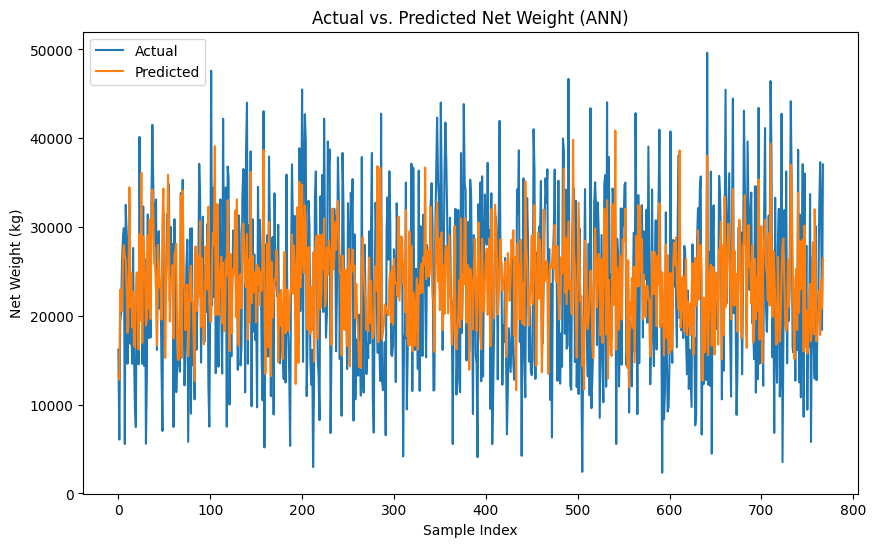

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv("Boralesgamuwa_2012_2018_with_features.csv")
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.drop(data.select_dtypes(exclude='number').columns, axis=1, inplace=True)

# Feature engineering
data['week_of_year'] = data.index.isocalendar().week
data['day_of_year'] = data.index.dayofyear
data['is_month_start'] = data.index.is_month_start.astype(int)
data['is_month_end'] = data.index.is_month_end.astype(int)

# Define features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'week_of_year', 'day_of_year', 'is_month_start', 'is_month_end']
X = pd.get_dummies(data[features], columns=['week_of_year'])
y = data['net_weight_kg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer
    keras.layers.Dense(1)  # Output layer (regression)
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error as the loss function

# Train the ANN model
model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)  # 50 epochs for training

# Evaluate the model with the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics including MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape, "%")  # MAPE as a percentage

# Plot actual vs. predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.reset_index(drop=True), label='Actual')
plt.plot(range(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight (ANN)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and preprocess the dataset
data = pd.read_csv("Boralesgamuwa_2012_2018_with_features.csv")
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.drop(data.select_dtypes(exclude='number').columns, axis=1, inplace=True)

# Feature engineering
data['week_of_year'] = data.index.isocalendar().week
data['day_of_year'] = data.index.dayofyear
data['is_month_start'] = data.index.is_month_start.astype(int)
data['is_month_end'] = data.index.is_month_end.astype(int)

# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data.resample('M').size())
plt.title('Monthly Ticket Counts')
plt.xlabel('Date')
plt.ylabel('Ticket Count')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(data.sample(1000))  # Sampling 1000 data points for faster plotting
plt.show()



# Seasonal Decomposition
decomposition = seasonal_decompose(data.resample('M').size(), model='additive')
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Load and preprocess the dataset
data = pd.read_csv("Boralesgamuwa_2012_2018_with_features.csv")
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.drop(data.select_dtypes(exclude='number').columns, axis=1, inplace=True)

# Feature engineering
data['week_of_year'] = data.index.isocalendar().week
data['day_of_year'] = data.index.dayofyear
data['is_month_start'] = data.index.is_month_start.astype(int)
data['is_month_end'] = data.index.is_month_end.astype(int)

# Define features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'day_of_week', 'month', 'week_of_year', 'day_of_year', 'is_month_start', 'is_month_end']
X = pd.get_dummies(data[features], columns=['day_of_week', 'month'])
y = data['net_weight_kg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('svm', SVR()),
    ('knn', KNeighborsRegressor()),
    ('rf', RandomForestRegressor()),
    ('lgb', lgb.LGBMRegressor()),
    ('xgb', xgb.XGBRegressor())
]

# Meta-model for stacking
meta_model = ElasticNet()

# Create a pipeline with scaling and stacking
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5  # Cross-validation for robustness
    ))
])

# Define a broader parameter grid for RandomizedSearchCV
param_grid = {
    'stacking__svm__C': [0.01, 0.1, 1, 10, 100],
    'stacking__svm__epsilon': [0.01, 0.1, 0.5, 1.0],
    'stacking__svm__kernel': ['linear', 'rbf', 'poly'],
    'stacking__knn__n_neighbors': [3, 5, 7, 9],
    'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__rf__max_depth': [None, 10, 20, 30],
    'stacking__lgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__lgb__num_leaves': [31, 62, 93],
    'stacking__xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__xgb__max_depth': [3, 6, 9],
    'stacking__xgb__n_estimators': [100, 200, 300],
    'stacking__final_estimator__alpha': [0.1, 1, 10]
}

# RandomizedSearchCV for tuning with expanded parameter grid
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=100,  # Explore more combinations
    scoring='neg_mean_squared_error',  # Use MSE for regression tasks
    cv=5,
    verbose=1,
    n_jobs=-1,  # Parallel processing
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics including MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert MAPE to percentage

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape, "%")  # MAPE as a percentage

# Plot actual vs. predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()

# Predict solid waste for the next five years
# Load and preprocess the extended dataset (assuming it includes data for the next five years)
extended_data = pd.read_csv("Boralesgamuwa_2012_2023_with_features.csv")
extended_data['ticket_date'] = pd.to_datetime(extended_data['ticket_date'], errors='coerce')
extended_data.set_index('ticket_date', inplace=True)
extended_data.fillna(method='ffill', inplace=True)
extended_data.fillna(method='bfill', inplace=True)
extended_data.drop(extended_data.select_dtypes(exclude='number').columns, axis=1, inplace=True)

# Feature engineering for the extended dataset
extended_data['week_of_year'] = extended_data.index.isocalendar().week
extended_data['day_of_year'] = extended_data.index.dayofyear
extended_data['is_month_start'] = extended_data.index.is_month_start.astype(int)
extended_data['is_month_end'] = extended_data.index.is_month_end.astype(int)

# Define features for prediction
X_extended = pd.get_dummies(extended_data[features], columns=['day_of_week', 'month'])

# Standardize the features for prediction
X_extended_scaled = scaler.transform(X_extended)

# Use the best model to predict solid waste for the next five years
solid_waste_predictions = best_model.predict(X_extended_scaled)

# Plot solid waste predictions for the next five years
plt.figure(figsize=(10, 6))
plt.plot(extended_data.index, solid_waste_predictions, label='Predicted Solid Waste')
plt.xlabel('Date')
plt.ylabel('Solid Waste (kg)')
plt.title('Predicted Solid Waste for the Next Five Years')
plt.legend()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 1789, number of used features: 1
[LightGBM] [Info] Start training from score 23354.773617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.866e+10, tolerance: 1.661e+07
  model = cd_fast.enet_coordinate_descent(


Best hyperparameters: {'stacking__xgb__n_estimators': 200, 'stacking__xgb__max_depth': 9, 'stacking__xgb__learning_rate': 0.1, 'stacking__svm__kernel': 'rbf', 'stacking__svm__epsilon': 0.01, 'stacking__svm__C': 1, 'stacking__rf__n_estimators': 100, 'stacking__rf__max_depth': 20, 'stacking__lgb__num_leaves': 93, 'stacking__lgb__learning_rate': 0.01, 'stacking__knn__n_neighbors': 3, 'stacking__final_estimator__alpha': 0.1}
Testing Results:
RMSE: 9777.620632746077
R² Score: -0.009274720641231138
MAE: 8411.63228337762
MAPE: 52.58905565255788 %


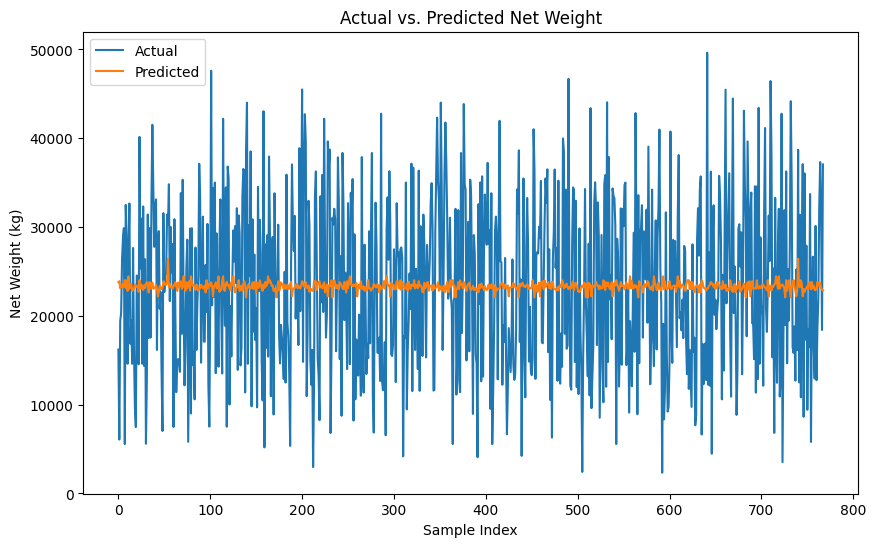

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/Boralesgamuwa_2012_2018_with_features.csv")

# Convert 'ticket_date' to datetime and set it as index
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Drop non-numeric columns and unnecessary fields
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data.drop(non_numeric_columns, axis=1, inplace=True)

# Feature engineering: Add 'week_of_year' feature
data['week_of_year'] = data.index.isocalendar().week

# Define features and target variable
features = ['week_of_year']
target = 'net_weight_kg'

# Define the features (no categorical variables to one-hot encode)
X = data[features]

# Define the target variable
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('svm', SVR()),  # Expand tuning for SVR
    ('knn', KNeighborsRegressor()),  # Expand tuning for KNN
    ('rf', RandomForestRegressor()),  # Expand tuning for RandomForestRegressor
    ('lgb', lgb.LGBMRegressor()),  # Expand tuning for LightGBM
    ('xgb', xgb.XGBRegressor())  # Expand tuning for XGBoost
]

# Meta-model for stacking
meta_model = ElasticNet()  # Change from Ridge to ElasticNet for better regularization

# Create a pipeline with scaling and stacking
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5  # Cross-validation for robustness
    ))
])

# Define a broader parameter grid for RandomizedSearchCV
param_grid = {
    'stacking__svm__C': [0.01, 0.1, 1, 10, 100],
    'stacking__svm__epsilon': [0.01, 0.1, 0.5, 1.0],
    'stacking__svm__kernel': ['linear', 'rbf', 'poly'],
    'stacking__knn__n_neighbors': [3, 5, 7, 9],
    'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__rf__max_depth': [None, 10, 20, 30],
    'stacking__lgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__lgb__num_leaves': [31, 62, 93],
    'stacking__xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__xgb__max_depth': [3, 6, 9],
    'stacking__xgb__n_estimators': [100, 200, 300],
    'stacking__final_estimator__alpha': [0.1, 1, 10]
}

# RandomizedSearchCV for tuning with expanded parameter grid
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=100,  # Increase iterations to explore more combinations
    scoring='neg_mean_squared_error',  # Using MSE for regression tasks
    cv=5,  # Cross-validation for robustness
    verbose=1,  # More verbose output for tracking progress
    n_jobs=-1,  # Use multiple cores
    random_state=42  # Consistency in results
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)

# Plot actual vs. predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 1789, number of used features: 26
[LightGBM] [Info] Start training from score 23354.773617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 1431, number of used features: 26
[LightGBM] [Info] Start training from score 23318.211041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

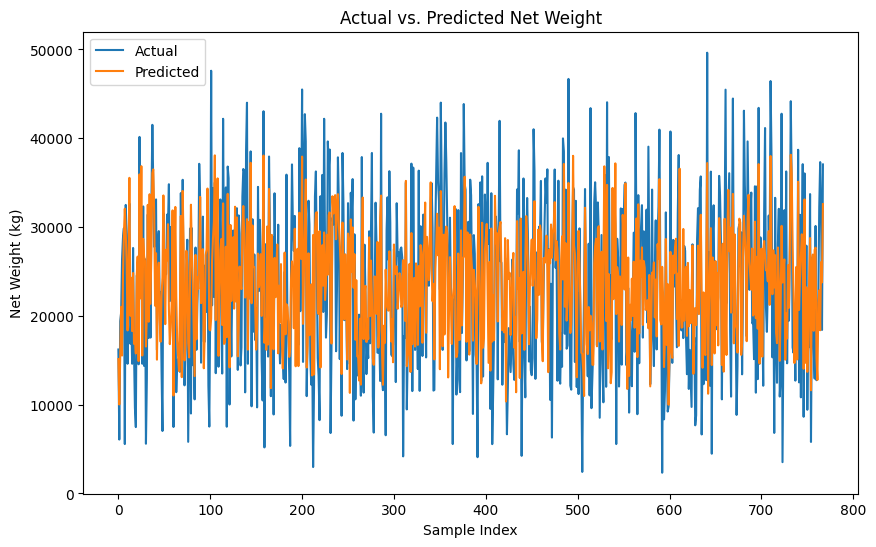

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/Boralesgamuwa_2012_2018_with_features.csv")

# Convert 'ticket_date' to datetime and set it as index
data['ticket_date'] = pd.to_datetime(data['ticket_date'], errors='coerce')
data.set_index('ticket_date', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Drop non-numeric columns and unnecessary fields
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data.drop(non_numeric_columns, axis=1, inplace=True)

# Feature engineering: Add additional features
data['week_of_year'] = data.index.isocalendar().week
data['day_of_year'] = data.index.dayofyear
data['is_month_start'] = data.index.is_month_start.astype(int)
data['is_month_end'] = data.index.is_month_end.astype(int)

# Define features and target variable
features = ['lag_1', 'lag_2', 'rolling_7', 'day_of_week', 'month', 'week_of_year', 'day_of_year', 'is_month_start', 'is_month_end']
target = 'net_weight_kg'

# One-hot encode categorical variables
X = pd.get_dummies(data[features], columns=['day_of_week', 'month'])

# Define the target variable
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('svm', SVR()),  # Expand tuning for SVR
    ('knn', KNeighborsRegressor()),  # Expand tuning for KNN
    ('rf', RandomForestRegressor()),  # Expand tuning for RandomForestRegressor
    ('lgb', lgb.LGBMRegressor()),  # Expand tuning for LightGBM
    ('xgb', xgb.XGBRegressor())  # Expand tuning for XGBoost
]

# Meta-model for stacking
meta_model = ElasticNet()  # Change from Ridge to ElasticNet for better regularization

# Create a pipeline with scaling and stacking
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5  # Cross-validation for robustness
    ))
])

# Define a broader parameter grid for RandomizedSearchCV
param_grid = {
    'stacking__svm__C': [0.01, 0.1, 1, 10, 1000],
    'stacking__svm__epsilon': [0.01, 0.1, 0.5, 1.0],
    'stacking__svm__kernel': ['linear', 'rbf', 'poly'],
    'stacking__knn__n_neighbors': [3, 5, 7, 9],
    'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__rf__max_depth': [None, 10, 20, 30],
    'stacking__lgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__lgb__num_leaves': [31, 62, 93],
    'stacking__xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'stacking__xgb__max_depth': [3, 6, 9],
    'stacking__xgb__n_estimators': [100, 200, 300],
    'stacking__final_estimator__alpha': [0.1, 1, 10]
}

# RandomizedSearchCV for tuning with expanded parameter grid
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=100,  # Increase iterations to explore more combinations
    scoring='neg_mean_squared_error',  # Using MSE for regression tasks
    cv=5,  # Cross-validation for robustness
    verbose=1,  # More verbose output for tracking progress
    n_jobs=-1,  # Use multiple cores
    random_state=42  # Consistency in results
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("Testing Results:")
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

# Plot actual vs. predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Net Weight (kg)')
plt.title('Actual vs. Predicted Net Weight')
plt.legend()
plt.show()
